# Cеточные модели уравнений с частными производными

## Лабораторная №5 (Метод Стрельбы)

Выполнил Мусатов Данила Юрьевич КМБО-03-18

Суть метода заключена в многократном решении задачи Коши для приближенного нахождения решения краевой задачи. Рассмотрим следующую краевую задачу на отрезке $[a, b]$ :

$$
y^{\prime \prime}=f\left(x, y, y^{\prime}\right)
$$

c граничными условиями

$$
y(a)=y_{a}, \quad y(b)=y_{b} .
$$

Вместо исходной задачи формулируется задача Коши с данным уравнением и с начальными условиями:

$$
y(a)=y_{0}, \quad y^{\prime}(a)=\eta
$$

где $\eta$ - некоторое значение тангенса угла наклона касательной к решению в точке $x=a .$ Положим сначала некоторое начальное значение параметру $\eta=\eta_{0}$, после чего решим каким-либо методом полученную задачу Коши. Пусть $y=y\left(x, y_{0}, \eta_{0}\right)-$ решение этой задачи на интервале $[a, b] .$ Тогда сравнивая значение функции $y\left(b, y_{0}, \eta_{0}\right)$ со значением $y_{1}$ на правом конце отрезка, можно получить информацию для корректировки угла наклона касательной к решению на левом конце отрезка. Решая задачу Коши для нового значения $\eta=\eta_{1}$, получим другое решение со значением $y\left(b, y_{0}, \eta_{1}\right)$ на правом конце. Таким образом значение решения на правом конце $y\left(b, y_{0}, \eta\right)$ будет являться функцией одной переменной \eta. Задачу можно сформулировать следующим образом: требуется найти значение переменной $\eta^{*}$ такое, чтобы решение $y\left(b, y_{0}, \eta^{*}\right)$ на правом конце отрезка совпало со значением $y_{1}$. Другими словами, решение исходной задачи эквивалентно нахождению корня уравнения

$$
\Phi(\eta)=0
$$

в котором $\Phi(\eta)=y\left(b, y_{0}, \eta\right)-y_{1}$.


#### Задание: (Вариант №2)
Решить краевую задачу для ОДУ второго порядка методом стрельбы.
$$\begin{array}{l}
\left(x^{2}-1\right) y^{\prime \prime}+(x-3) y^{\prime}-y=0, \\
y(0)=-18, \qquad\quad y(3)=0
\end{array}$$ 

### Аналитическое решение
$$
y=6(x-3)
$$

In [1]:
import matplotlib.pyplot as plt
#from math import cos, sin
from IPython.display import display
import ipywidgets as ip_w 
import numpy as np

In [2]:
# Функция для оценки максимального отклонения от аналитического решения
def max_error(xs, ys, source_func):
    return max(np.fabs(ys - source_func(xs)))

In [3]:
A = 0
B = 3
YA = -18
YB = 0

In [4]:
func = lambda x, y, z: (- (((x-3)*z) - y)/(x**2 - 1))

source_func = lambda x:  6*(x-3)    # аналитическое решение

def Method_Euler_without_recalc(func, a, b, y0, z0, h):
    #Euler method withot recalc
    xs = np.arange(a, b + h, h)
    ys = [y0]
    zs = [z0]
    for x in xs[1:]:
        ys.append(ys[-1] + h*zs[-1])
        zs.append(zs[-1] + h*func(x-h,ys[-1], zs[-1]))
    return xs, np.array(ys) , np.array(zs)                   
        
def Shooting_method(func, a, b, y0, y1, eps, z_now, h):
    _,y_t,_=Method_Euler_without_recalc(func, a, b, y0, z_now, h)
    F_n=y_t[len(y_t)-1]-y1
    while np.fabs(F_n)>eps:
        z_now_1 = z_now+0.001
        _,y_t_now,_ = Method_Euler_without_recalc(func, a, b, y0, z_now_1, h)
        F_n_now=y_t_now[len(y_t_now)-1]-y1
        if F_n > 0:
            if(F_n > F_n_now):
                sgn=1
            else:
                sgn=-1
        else:
            if(F_n>F_n_now):
                sgn=-1
            else:
                sgn=1
                
        while (F_n_now*F_n>0):
            z_now_1 += (0.1*sgn)
            _,y_t,_= Method_Euler_without_recalc(func, a, b, y0, z_now_1, h)
            F_n_now = y_t[len(y_t)-1]-y1
        z_now = (z_now+z_now_1)/2
        _,y_t,_=Method_Euler_without_recalc(func, a, b, y0, z_now, h)
        F_n=y_t[len(y_t)-1]-y1
    return z_now

def source_shooting(a, b,y0, y1, eps,z_start, h): #сравнение между методом стрельбы с применением метода Эйлера и точным значением
    print("y'="+ str(Shooting_method(func,a,b,y0,y1,eps,z_start,h)))
    xs, ys, zs = Method_Euler_without_recalc(func, a, b, y0, Shooting_method(func,a,b,y0,y1,eps,z_start,h), h)
    plt.rcParams["figure.figsize"] = (15,8)
    plt.grid(True)
    plt.plot(xs, zs, color="green", label="График производной полученной методом эйлера без перерасчета с шагом " + str(h))
    plt.plot(xs, ys, color="blue", label="Метод эйлера без перерасчета с шагом " + str(h))
    plt.plot(xs, source_func(xs), color="red", label=f"Точное аналитическое решение Задачи c шагом " + str(h))
    plt.legend()
    plt.show()
    print("Максимальное отклонение от аналитического решения с шагом " + str(h), "равно : ", max_error(xs, ys, source_func))
    

In [5]:
ip_w.interact(source_shooting, a=ip_w.fixed(A), b=ip_w.fixed(B),  y0 = ip_w.fixed(YA), y1 = ip_w.fixed(YB), eps=ip_w.FloatSlider(min=0.01, max=0.1, step=0.01),z_start=ip_w.fixed(4) , h=ip_w.FloatSlider(min=0.03, max=0.08, step=0.015));

interactive(children=(FloatSlider(value=0.01, description='eps', max=0.1, min=0.01, step=0.01), FloatSlider(va…

## Оценка погрешности с помощью правила Рунге

$$error = \frac{| y_h - y_{h/2}|}{2^p - 1}$$ 

In [6]:
def Runge_rule(ys1, ys2, p=1):
    return max(np.fabs(ys1 - ys2))/(2**p - 1)

In [7]:
def Shooting_estimation_error_Ruge_depending_on_h(a, b,y0, y1, eps,z_start, h):
    _, ys1,_ = Method_Euler_without_recalc(func, a, b, y0, Shooting_method(func,a,b,y0,y1,eps,z_start,h), h)
    _, ys2,_ = Method_Euler_without_recalc(func, a, b, y0, Shooting_method(func,a,b,y0,y1,eps,z_start,h/2), h/2)
    if(len(ys1)!=len(ys2[::2])):
        ys1=np.delete(ys1,len(ys1)-1,0)
    err1 = Runge_rule(ys1, ys2[::2],1)
    print(f" Ошибка по Правилу рунге для шага {h} равна {round(err1, 7)}" )

In [8]:
ip_w.interact(Shooting_estimation_error_Ruge_depending_on_h, a=ip_w.fixed(A), b=ip_w.fixed(B),  y0 = ip_w.fixed(YA), y1 = ip_w.fixed(YB), eps=ip_w.FloatSlider(min=0.01, max=0.1, step=0.01),z_start=ip_w.fixed(4) , h=ip_w.FloatSlider(min=0.03, max=0.08, step=0.015));

interactive(children=(FloatSlider(value=0.01, description='eps', max=0.1, min=0.01, step=0.01), FloatSlider(va…

Ошибка по Правилу рунге для шага 0.03 равна 0.1779034</br>
Ошибка по Правилу рунге для шага 0.075 равна 0.4313952

## Нахождение решения с помощью библиотеки scipy

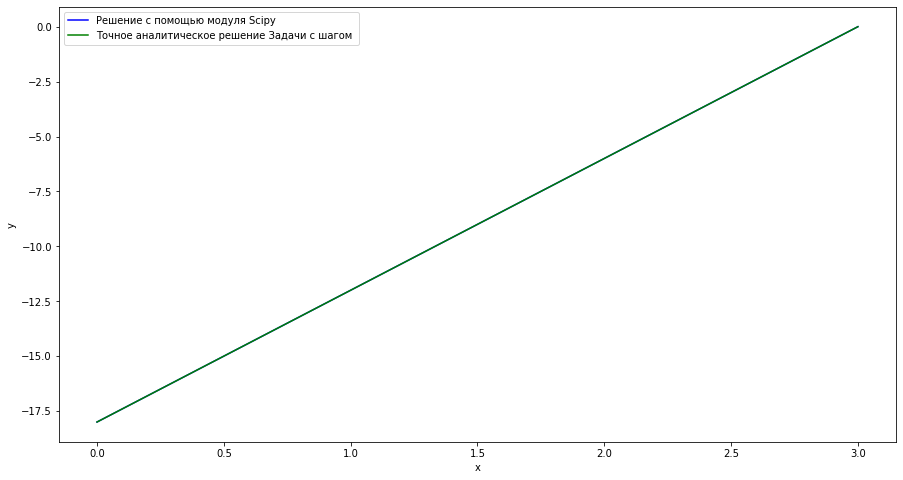

Максимальное отклонение от аналитического решения с шагом  равно :  7.105427357601002e-15


In [9]:
from scipy.integrate import odeint, solve_bvp
import numpy as np
import matplotlib.pyplot as plt

def dydx(x, y):
    dy0 = y[1]
    dy1 = (-(x-3)/(x**2-1))*y[1]+(1/(x**2-1))*y[0]
    return np.vstack((dy0, dy1))

def boundCond(ya, yb):
    fa = -18
    fb = 0
    return np.array([ya[0]-fa,yb[0]-fb])

xa, xb = 0, 3 
xini = np.linspace(xa, xb, 11) 
yini = np.zeros((2, xini.size))
res = solve_bvp(dydx, boundCond, xini, yini)
xs = np.linspace(xa, xb, 100) 
ys = res.sol(xs)[0]
plt.plot(xs, ys,  color="blue", label="Решение с помощью модуля Scipy ")
plt.plot(xs, source_func(xs), color="green", label=f"Точное аналитическое решение Задачи c шагом " )
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()    
print("Максимальное отклонение от аналитического решения с шагом ", "равно : ", max_error(xs, ys, source_func))

Значения от аналитического решения отличаются на 10^(-15)